
# QatarAirways ✈️




### Data Analysis for Qatar Airways

In this document, we delve into the data analysis of Qatar Airways, unveiling insights to enhance operational efficiency and elevate the customer experience.






**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
print("Setup Complete")


Setup Complete


In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Reset warnings to default behavior (optional)
# warnings.filterwarnings("default")

**Loading Dataset**

In [69]:
Qatar = pd.read_csv('qatar_airways_reviews.csv')


In [70]:
Qatar.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


The results presented in the dataset showcase various reviews and feedback from passengers who have flown with Qatar Airways. Each row represents a distinct review, detailing aspects such as the date of publication, the author's country of origin, the rating given to the flight experience, the type of traveler (e.g., solo leisure, couple leisure), the seat type (e.g., economy class, business class), the specific route flown, the aircraft type, and whether the reviewer recommends Qatar Airways. These insights offer valuable perspectives on the overall passenger satisfaction, areas of improvement, and noteworthy experiences encountered during their journeys with the airline.







In [5]:
print("DataFrame Dimensions (Rows, Columns):", Qatar.shape)


DataFrame Dimensions (Rows, Columns): (2369, 16)


In [6]:
column_data_types = Qatar.dtypes
print("Dataframe Column Data Types:")
print(column_data_types)

Dataframe Column Data Types:
Unnamed: 0             int64
Date Published        object
Rating               float64
Max Rating           float64
Title                 object
Author                object
Country               object
Date                  object
Review Body           object
Type Of Traveller     object
Seat Type             object
Route                 object
Date Flown            object
Recommended           object
Aircraft              object
Verified             float64
dtype: object


In [7]:
print("Number of Duplicate Rows:",Qatar.duplicated().sum())
duplicate = Qatar[Qatar.duplicated()]
print("Duplicate Rows:", duplicate)

Number of Duplicate Rows: 0
Duplicate Rows: Empty DataFrame
Columns: [Unnamed: 0, Date Published, Rating, Max Rating, Title, Author, Country, Date, Review Body, Type Of Traveller, Seat Type, Route, Date Flown, Recommended, Aircraft, Verified]
Index: []


In summary, the dataset appears to have no issues with row duplication, suggesting that the data is clean in terms of duplicates. Consequently, the user can proceed with their analysis or data processing without concerns about duplication.







In [8]:
null_counts_per_column = Qatar.isnull().sum()
print("Null Value Counts per Column:")
print(null_counts_per_column)

Null Value Counts per Column:
Unnamed: 0              0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64


The results indicate the presence of missing data in the Qatar DataFrame across several columns. 

While most columns are largely complete, some exhibit notable numbers of null values. For instance, the 'Type Of Traveller', 'Route', 'Date Flown', 'Recommended', 'Aircraft', and 'Verified' columns display significant counts of missing values. 

In [39]:
print("percentage of missing values in Rating column:",round(Qatar['Rating'].isna().sum()/len(Qatar['Rating'])*100,2))
print("percentage of missing values in Max Rating column:",round(Qatar['Max Rating'].isna().sum()/len(Qatar['Max Rating'])*100,2))

percentage of missing values in Rating column: 0.04
percentage of missing values in Max Rating column: 0.04


In [40]:
Qatar['Rating'] = Qatar['Rating'].fillna(Qatar['Rating'].mode()[0])
Qatar['Max Rating'] = Qatar['Max Rating'].fillna(Qatar['Max Rating'].mode()[0])

In summary, these lines of code provide a strategy to impute missing values in the 'Rating' and 'Max Rating' columns using the most common value in each of them. This helps preserve data integrity and prevent loss of information due to missing values.







In [41]:
print("percentage of missing values in Recommended column:",round(Qatar['Recommended'].isna().sum()/len(Qatar['Recommended'])*100,2))

percentage of missing values in Recommended column: 75.18


In [42]:

Qatar['Recommended'] = Qatar.apply(lambda row: 'yes' if pd.isna(row['Recommended']) and row['Rating'] > 6 else ('no' if pd.isna(row['Recommended']) and row['Rating'] < 4 else row['Recommended']), axis=1)


If the value of 'Recommended' is null (pd.isna(row['Recommended'])) and the value of 'Rating' is greater than 6, 'yes' is assigned. If the value of 'Recommended' is null and the value of 'Rating' is less than 4, 'no' is assigned. Otherwise, the current value of 'Recommended' is retained.







In [43]:
Qatar['Recommended'] = Qatar['Recommended'].fillna('so-so')


To help maintain data integrity and prevent potential issues when working with this column in subsequent analyses.


In [44]:
# Convert the 'Date Published' column to datetime type
Qatar['Date Published'] = pd.to_datetime(Qatar['Date Published'])
    
Qatar['Published Year'] = Qatar['Date Published'].dt.year


Extract the year from the date column and store it in a new column

In [15]:
null_counts_per_column = Qatar.isnull().sum()
print("Null Value Counts per Column:")
print(null_counts_per_column)

Null Value Counts per Column:
Unnamed: 0              0
Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended             0
Aircraft             1088
Verified             1117
Published Year          0
dtype: int64


In [45]:
Qatar['Rating'] = Qatar['Rating'].astype('int32')


Useful for performing specific mathematical operations or analyses that require integer numerical data instead of floating-point values.







**Exploratory Data Analysis (EDA)**

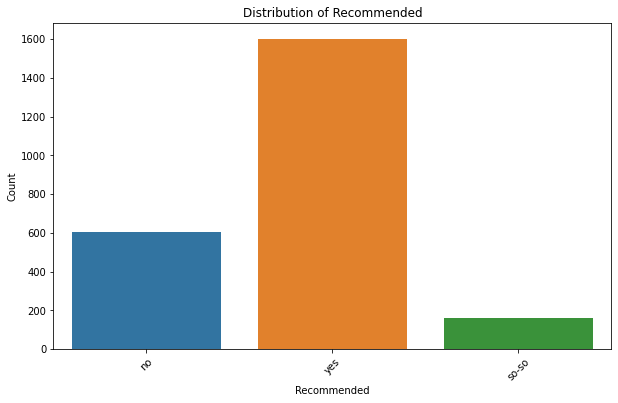

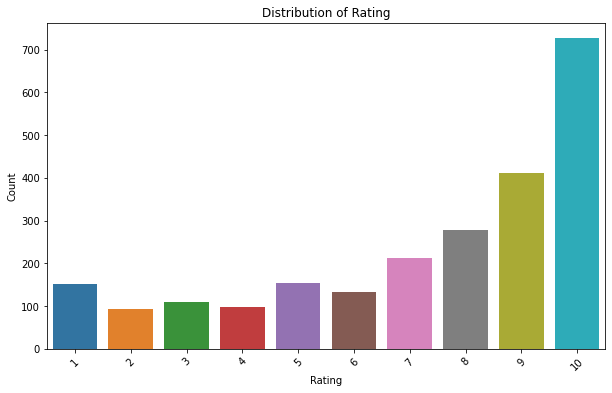

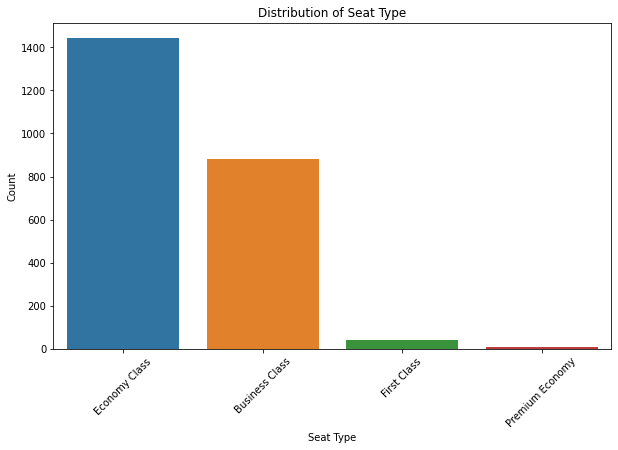

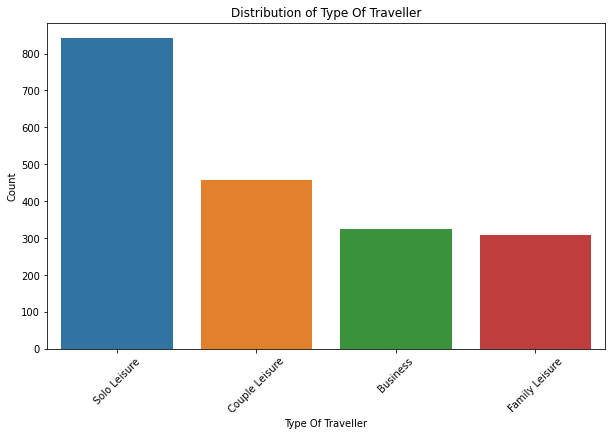

In [46]:
def dist_plot(col, data):
    plt.figure(figsize=(10, 6))
    
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        sns.histplot(data=data, x=col, kde=False)
    else:
        sns.countplot(data=data, x=col)
        
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

dist_plot("Recommended", Qatar)
dist_plot("Rating", Qatar)
dist_plot("Seat Type", Qatar)
dist_plot("Type Of Traveller", Qatar)


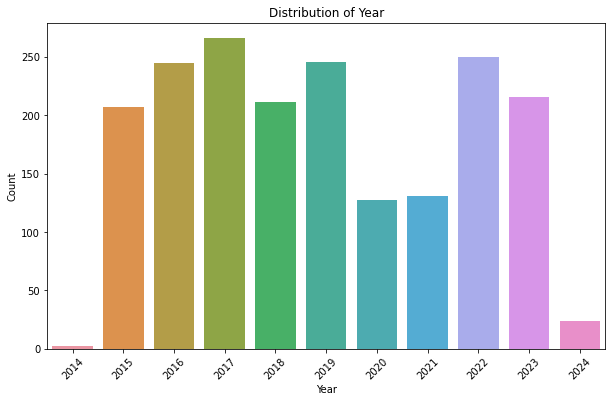

In [86]:
def dist_plot(col, data):
    plt.figure(figsize=(10, 6))
    
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        sns.histplot(data=data, x=col, kde=False)
    else:
        sns.barplot(data=data, x=col, y='Count', estimator=sum)
        
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Preprocesar los datos para obtener el recuento de vuelos por año
Qatar['Date Flown'] = pd.to_datetime(Qatar['Date Flown'])
Qatar['Year'] = Qatar['Date Flown'].dt.strftime('%Y')
flight_counts_per_year = Qatar['Year'].value_counts().reset_index()
flight_counts_per_year.columns = ['Year', 'Count']

# Ordenar el DataFrame por año
flight_counts_per_year = flight_counts_per_year.sort_values(by='Year')

# Llamar a la función dist_plot con la columna 'Year' y los datos de recuento de vuelos por año
dist_plot("Year", flight_counts_per_year)




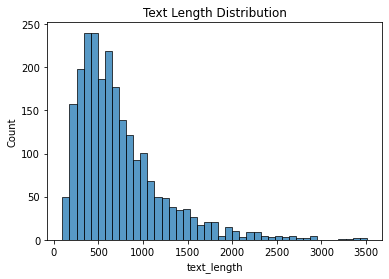

In [48]:
# Text Length Analysis
Qatar['text_length'] = Qatar['Review Body'].apply(len)
sns.histplot(Qatar['text_length'])
plt.title('Text Length Distribution')
plt.show()

**Feature Engineering**

In [49]:
import re
import string
import plotly.express as px
import concurrent.futures
from collections import Counter

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk


# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Tokenize the text, remove stop words, and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

tokenized_words = [word.lower() for review in Qatar['Review Body'] for word in word_tokenize(review) if word.lower() not in stop_words and word.lower() not in punctuation]

# Count word frequencies
word_counts = Counter(tokenized_words)

# Get the top 50 words and their frequencies
top_words = dict(word_counts.most_common(50))

# Create a DataFrame for the top words and their frequencies
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Create a bar chart using Plotly Express
fig = px.bar(top_words_df, x='Word', y='Frequency', title='Top 50 Words in Review Body (excluding stop words and punctuation)')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=list(range(50)))

# Show the plot
fig.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
import re
import string
import concurrent.futures
from nltk.corpus import stopwords

# Definir la lista de stopwords
stop_words = set(stopwords.words('english'))

def remove_special_characters(sentence):
    # Remove special characters and numerals
    cleaned_sentence = re.sub(r'[^A-Za-z\s]', '', sentence)
    return cleaned_sentence

def remove_hyperlink(sentence):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    cleaned_sentence = re.sub(url_pattern, '', sentence)
    return cleaned_sentence

def remove_number(sentence):
    return re.sub(r'\d+', '', sentence)

def remove_whitespace(sentence):
    return sentence.strip()

def remove_punctuation(sentence):
    # Mantener la coma y reemplazar "،" con un espacio
    sentence = sentence.translate(str.maketrans(dict.fromkeys(string.punctuation.replace(',', '') + '،', ' ')))
    return sentence

def convert_to_lowercase(sentence):
    return sentence.lower()

def remove_stopwords(sentence, stop_words):
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def process_text(sentence):
    sentence = remove_hyperlink(sentence)
    sentence = remove_number(sentence)
    sentence = remove_whitespace(sentence)
    sentence = remove_punctuation(sentence)
    sentence = remove_special_characters(sentence)
    sentence = convert_to_lowercase(sentence)
    sentence = remove_stopwords(sentence, stop_words)
    return sentence

# Function to process a column of text in parallel
def process_column_parallel(column):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        processed_column = list(executor.map(process_text, column))
    return processed_column

# Aplicar la función de procesamiento en paralelo a la columna del DataFrame
Qatar['Review Body'] = process_column_parallel(Qatar['Review Body'])



In [78]:
Qatar['Processed Review Body'] = X
Qatar[['Review Body', 'Processed Review Body']]

,Review Body,Processed Review Body
0,delay flight haneda doha caused bit chaos upon...,delay flight haneda doha caus bit chao upon ar...
1,convinced needed pay add middle name flight al...,convinc need pay add middl name flight wouldnt...
2,sent emails received automatic response emails...,sent email receiv automat respons email initi ...
3,flew probably first airline received keep good...,flew probabl first airlin receiv keep good cav...
4,service ok pretty good aisle extremely slow wi...,servic ok pretti good aisl extrem slow wife se...
...,...,...
2364,flew first class cai doh qr th aug qatar vip l...,flew first class caidoh qr th aug qatar vip lo...
2365,took flight london th july year old son wife t...,took flight london th juli year old son wife t...
2366,mad doh dxb back boeing mad doh sectors nice s...,maddohdxb back boe maddoh sector nice spaciou ...
2367,gva auh good food main meal nothing else serve...,gvaauh good food main meal noth els serv find ...


In [79]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

label_mapping = {}
for column in ['Type Of Traveller', 'Seat Type', 'Recommended']:
    Qatar[column] = label_encoder.fit_transform(Qatar[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

Qatar.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,Processed Review Body
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,delay flight haneda doha caused bit chaos upon...,3,1,Tokyo to London Heathrow via Doha,March 2024,0,NaN,0.0,delay flight haneda doha caus bit chao upon ar...
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,convinced needed pay add middle name flight al...,1,0,Doha to Montreal,February 2024,0,NaN,1.0,convinc need pay add middl name flight wouldnt...
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,sent emails received automatic response emails...,0,1,Doha to Perth,November 2023,0,A380,1.0,sent email receiv automat respons email initi ...
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,flew probably first airline received keep good...,1,2,Doha to London Heathrow,February 2024,1,A380-800,1.0,flew probabl first airlin receiv keep good cav...
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,service ok pretty good aisle extremely slow wi...,1,0,Auckland to Doha,February 2024,0,A350,1.0,servic ok pretti good aisl extrem slow wife se...


In [80]:
for column, mapping in label_mapping.items():
    print(f"Mapping for {column}:\n", mapping)

Mapping for Type Of Traveller:
 {'Business': 0, 'Couple Leisure': 1, 'Family Leisure': 2, 'Solo Leisure': 3, nan: 4}
Mapping for Seat Type:
 {'Business Class': 0, 'Economy Class': 1, 'First Class': 2, 'Premium Economy': 3}
Mapping for Recommended:
 {'no': 0, nan: 1}


In [81]:
from textblob import TextBlob

# Define a function to classify comments as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply TextBlob to calculate sentiment polarity and classify comments
Qatar['Sentiment Class'] = Qatar['Processed Review Body'].apply(lambda x: classify_sentiment(TextBlob(str(x)).sentiment.polarity))

# Display processed comments along with their corresponding sentiment class
print(Qatar[['Processed Review Body', 'Sentiment Class']].head())



                               Processed Review Body Sentiment Class
0  delay flight haneda doha caus bit chao upon ar...        Positive
1  convinc need pay add middl name flight wouldnt...         Neutral
2  sent email receiv automat respons email initi ...        Negative
3  flew probabl first airlin receiv keep good cav...        Positive
4  servic ok pretti good aisl extrem slow wife se...        Positive


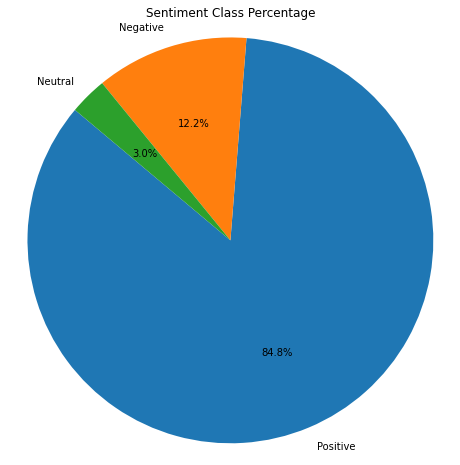

In [82]:
import matplotlib.pyplot as plt

# Count unique values in the 'Sentiment Class' column
sentiment_counts = Qatar['Sentiment Class'].value_counts()

# Create a pie chart with white background
plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Class Percentage')
plt.axis('equal')  # To ensure the chart is a circle
plt.show()



The WordClouds provide a visual representation of the most frequent words in each category of comments, helping to identify common themes or sentiments expressed by reviewers.

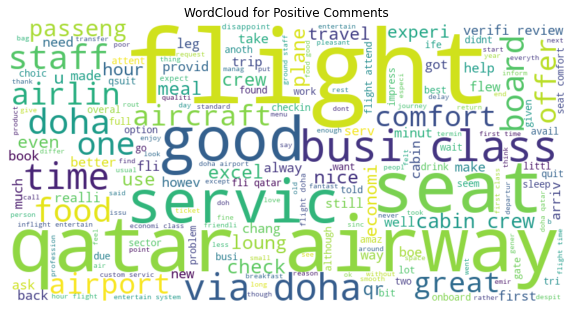

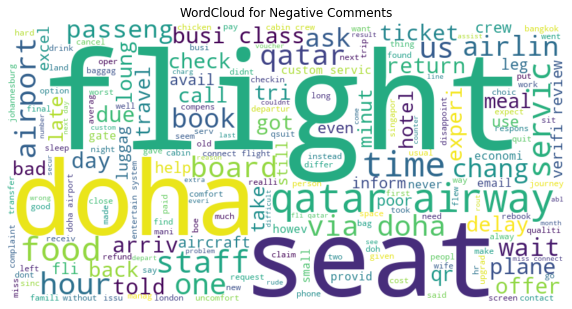

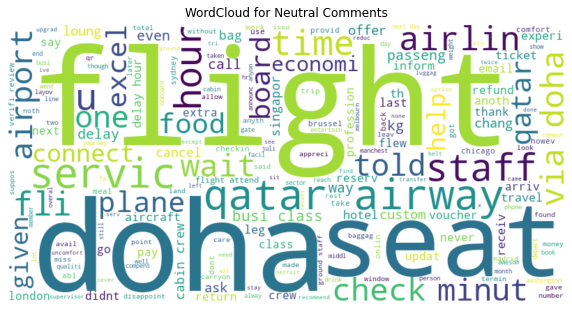

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive comments
positive_comments = Qatar[Qatar['Sentiment Class'] == 'Positive']['Processed Review Body'].values

# Concatenate positive comments into a single text
positive_text = ' '.join(positive_comments)

# Create WordCloud for positive comments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display WordCloud for positive comments
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Positive Comments')
plt.axis('off')
plt.show()

# Filter negative comments
negative_comments = Qatar[Qatar['Sentiment Class'] == 'Negative']['Processed Review Body'].values

# Concatenate negative comments into a single text
negative_text = ' '.join(negative_comments)

# Create WordCloud for negative comments
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display WordCloud for negative comments
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Negative Comments')
plt.axis('off')
plt.show()

# Filter neutral comments
neutral_comments = Qatar[Qatar['Sentiment Class'] == 'Neutral']['Processed Review Body'].values

# Concatenate neutral comments into a single text
neutral_text = ' '.join(neutral_comments)

# Create WordCloud for neutral comments
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display WordCloud for neutral comments
plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Neutral Comments')
plt.axis('off')
plt.show()


This code improves the visualization of the WordClouds for positive and negative comments by filtering out the 10 most common words found in neutral comments. By removing these neutral words, the WordClouds become more focused on the distinctive words present in positive and negative comments, making it easier to identify which words are most frequently associated with positive or negative sentiment.








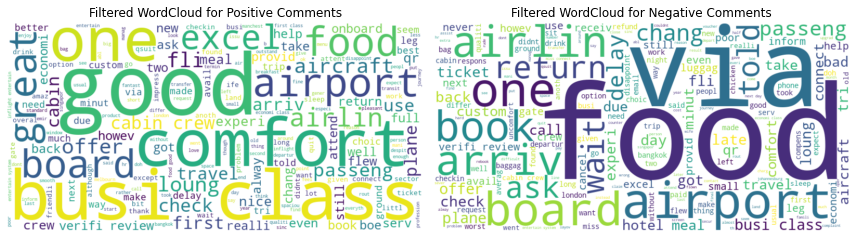

In [85]:
from collections import Counter

# Get the 10 most common words in neutral comments
neutral_word_counts = Counter(neutral_text.split())
most_common_neutral_words = [word for word, _ in neutral_word_counts.most_common(10)]

# Filter neutral words from positive comments
filtered_positive_text = ' '.join([word for word in positive_text.split() if word not in most_common_neutral_words])

# Filter neutral words from negative comments
filtered_negative_text = ' '.join([word for word in negative_text.split() if word not in most_common_neutral_words])

# Create updated WordClouds for positive and negative comments
filtered_positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_positive_text)
filtered_negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_negative_text)

# Show the updated WordClouds for positive and negative comments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(filtered_positive_wordcloud, interpolation='bilinear')
plt.title('Filtered WordCloud for Positive Comments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_negative_wordcloud, interpolation='bilinear')
plt.title('Filtered WordCloud for Negative Comments')
plt.axis('off')

plt.tight_layout()
plt.show()


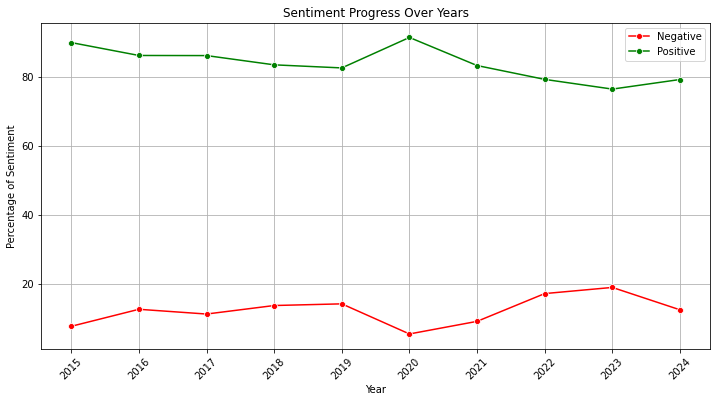

In [91]:
def sentiment_progress(data):
    # Filter the data from the year 2015 onwards
    data = data[data['Year'] >= '2015']
    
    # Calculate the percentage of negative and positive comments per year
    negative_sentiment_percentage = data[data['Sentiment Class'] == 'Negative'].groupby('Year').size() / data.groupby('Year').size() * 100
    positive_sentiment_percentage = data[data['Sentiment Class'] == 'Positive'].groupby('Year').size() / data.groupby('Year').size() * 100
    
    # Sort the DataFrame by year
    sentiment_percentage = pd.DataFrame({'Negative': negative_sentiment_percentage, 'Positive': positive_sentiment_percentage}).reset_index()
    
    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sentiment_percentage, x='Year', y='Negative', marker='o', color='red', label='Negative')
    sns.lineplot(data=sentiment_percentage, x='Year', y='Positive', marker='o', color='green', label='Positive')
    
    # Customize the plot
    plt.title('Sentiment Progress Over Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Sentiment')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the sentiment_progress function with the comments and sentiment data
sentiment_progress(Qatar)

